<a href="https://colab.research.google.com/github/shritech1404/CNN-Model-with-Keras/blob/main/CNN_with_data_argumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, untar = True)

In [3]:
data_dir

'/root/.keras/datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/5487945052_bcb8e9fc8b_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/14687731322_5613f76353.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15255964274_cf2ecdf702.jpg')]

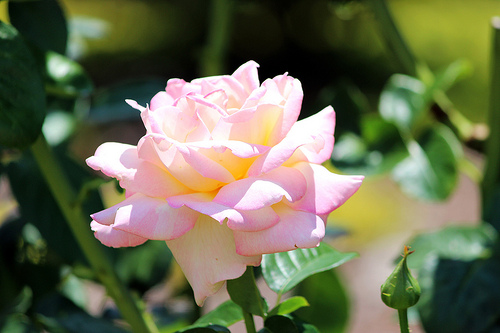

In [7]:
PIL.Image.open(str(roses[1]))

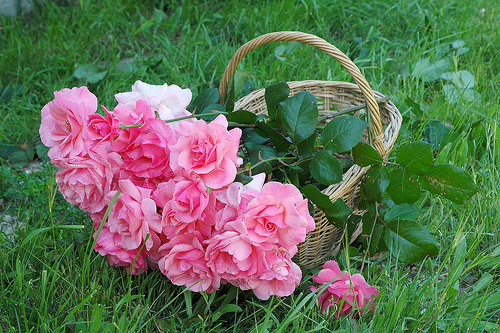

In [8]:
PIL.Image.open(str(roses[10]))

In [9]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('/root/.keras/datasets/flower_photos/tulips/4955884820_7e4ce4d7e5_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/14116780333_7836f4448c.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/5661431592_cea1108261_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/17862445825_f7031d6f26.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/6325571510_7544b27e57_n.jpg')]

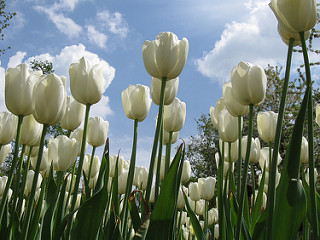

In [10]:
PIL.Image.open(str(tulips[10]))

In [11]:
 flower_image_dict = {
     "roses" : list(data_dir.glob('roses/*')),
     "daisy" : list(data_dir.glob('daisy/*')),
     "dandelion" : list(data_dir.glob('dandelion/*')),
     "sunflowers" : list(data_dir.glob('sunflowers/*')),
     "tulips" : list(data_dir.glob('tulips/*'))
 }

In [12]:
flower_label_dict = {
     "roses" : 0,
     "daisy" : 1,
     "dandelion" : 2,
     "sunflowers" : 3,
     "tulips" : 4
}

In [13]:
str(flower_image_dict['roses'][0])

'/root/.keras/datasets/flower_photos/roses/5487945052_bcb8e9fc8b_m.jpg'

In [14]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 240, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flower_image_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [18]:
X, y = [], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_label_dict[flower_name])

In [19]:
y[1700]

2

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
X_train.shape

(2752, 180, 180, 3)

In [23]:
len(X_train)

2752

In [24]:
len(X_test)

918

In [25]:
X_train = X_train / 255
X_test = X_test / 255

In [26]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 73s 845ms/step - loss: 1.7398 - accuracy: 0.3273
Epoch 2/30
86/86 [==============================] - 73s 843ms/step - loss: 1.0763 - accuracy: 0.5626
Epoch 3/30
86/86 [==============================] - 73s 854ms/step - loss: 0.8566 - accuracy: 0.6699
Epoch 4/30
86/86 [==============================] - 73s 846ms/step - loss: 0.6746 - accuracy: 0.7530
Epoch 5/30
86/86 [==============================] - 73s 844ms/step - loss: 0.4762 - accuracy: 0.8334
Epoch 6/30
86/86 [==============================] - 73s 848ms/step - loss: 0.2910 - accuracy: 0.9105
Epoch 7/30
86/86 [==============================] - 73s 848ms/step - loss: 0.1696 - accuracy: 0.9476
Epoch 8/30
86/86 [==============================] - 73s 848ms/step - loss: 0.1255 - accuracy: 0.9645
Epoch 9/30
86/86 [==============================] - 73s 850ms/step - loss: 0.0593 - accuracy: 0.9824
Epoch 10/30
86/86 [==============================] - 73s 852ms/step - loss: 0.0874 - accura

In [28]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 8s 260ms/step - loss: 2.7195 - accuracy: 0.6460


[2.7195074558258057, 0.6459695100784302]

In [31]:
predictions = model.predict(X_test)
predictions

array([[ -9.8914585 ,   1.6266985 ,   4.7376766 ,  -7.2514296 ,
         -0.05931969],
       [  6.9437675 , -10.021251  , -13.049357  , -11.569406  ,
         -0.7304708 ],
       [  5.2157927 ,   3.216655  ,  18.946579  , -22.740856  ,
         -7.059934  ],
       ...,
       [-14.826446  , -21.466887  , -21.038038  ,  16.126991  ,
         -1.1066655 ],
       [ -6.2828674 ,  -7.2900624 ,   0.7294531 ,  -1.0048953 ,
         -6.7808824 ],
       [  0.6717152 ,  -9.363376  , -10.373601  ,   0.41828245,
         -6.072266  ]], dtype=float32)

In [32]:
score = tf.nn.softmax(predictions[0])


In [34]:
np.argmax(score)

2

In [35]:
y_test[0]

1

In [38]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

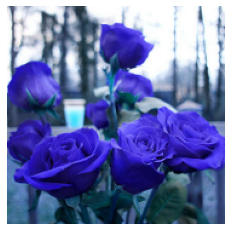

In [39]:
plt.axis('off')
plt.imshow(X[0])

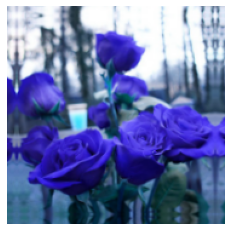

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [41]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 92s 1s/step - loss: 1.5246 - accuracy: 0.3569
Epoch 2/10
86/86 [==============================] - 92s 1s/step - loss: 1.0754 - accuracy: 0.5559
Epoch 3/10
86/86 [==============================] - 92s 1s/step - loss: 0.9374 - accuracy: 0.6214
Epoch 4/10
86/86 [==============================] - 92s 1s/step - loss: 0.8501 - accuracy: 0.6743
Epoch 5/10
86/86 [==============================] - 92s 1s/step - loss: 0.8182 - accuracy: 0.6775
Epoch 6/10
86/86 [==============================] - 92s 1s/step - loss: 0.7166 - accuracy: 0.7290
Epoch 7/10
86/86 [==============================] - 94s 1s/step - loss: 0.6831 - accuracy: 0.7313
Epoch 8/10
86/86 [==============================] - 92s 1s/step - loss: 0.6703 - accuracy: 0.7307
Epoch 9/10
86/86 [==============================] - 92s 1s/step - loss: 0.6383 - accuracy: 0.7363
Epoch 10/10
86/86 [==============================] - 93s 1s/step - loss: 0.6116 - accuracy: 0.7648


In [43]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 8s 269ms/step - loss: 0.7959 - accuracy: 0.6993


[0.7959110736846924, 0.6993464231491089]